Cilj je u 2D-u predstaviti putanju bespilotne letelice od pocetnog stanja O, do krajnje pozicije T; ulaz je brzina letelice i ugao kretanja

In [11]:
import numpy as np
import matplotlib.pyplot as plt

tau_v = 4  
tau_theta = 0.4  
v_max = 10  
v_min = 3   
a_max = 3   
omega_max = 2.618  

v = np.random.uniform(v_min, v_max)
theta = np.deg2rad(np.random.uniform(0, 90))  
x, y = 0, 0  

v_c = np.random.uniform(v_min, v_max) 
theta_c = np.deg2rad(np.random.uniform(0, 90)) 

T = 0.05  
num_steps = 200  

x_values, y_values = [x], [y]
v_values, theta_values = [v], [theta]

for step in range(num_steps):
    v_dot = (v_c - v) / tau_v
    theta_dot = (theta_c - theta) / tau_theta

    v_dot = np.clip(v_dot, -a_max, a_max)
    theta_dot = np.clip(theta_dot, -omega_max, omega_max)

    v += v_dot * T
    theta += theta_dot * T

    v = np.clip(v, v_min, v_max)

    x += v * np.cos(theta) * T
    y += v * np.sin(theta) * T

    x_values.append(x)
    y_values.append(y)
    v_values.append(v)
    theta_values.append(np.rad2deg(theta))  


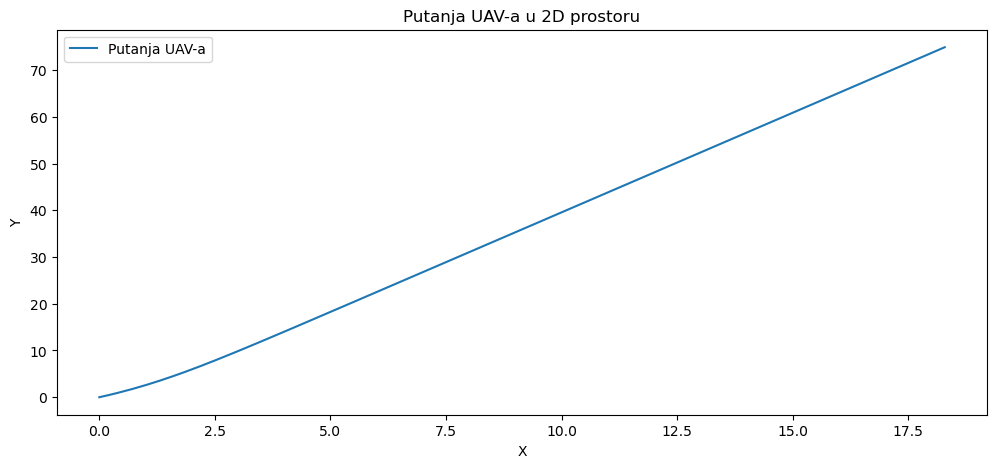

In [12]:
plt.figure(figsize=(12, 5))
plt.plot(x_values, y_values, label='Putanja UAV-a')
plt.title('Putanja UAV-a u 2D prostoru')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.show()

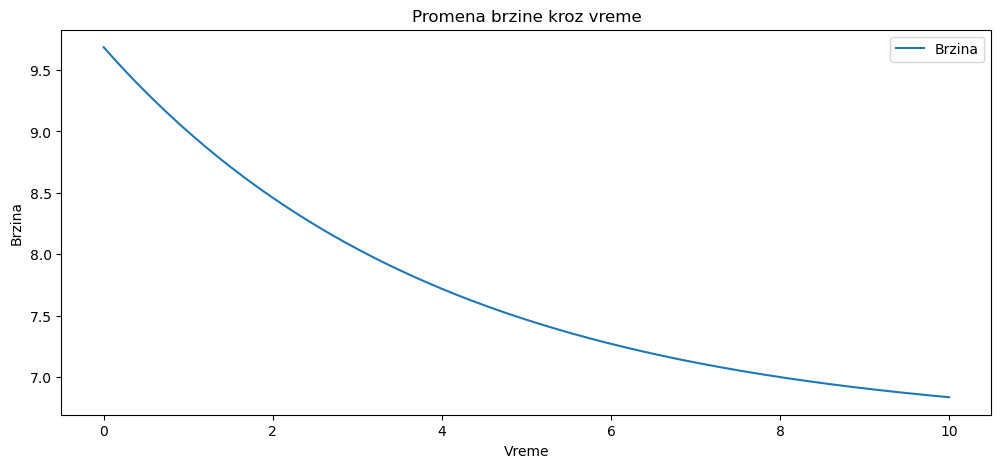

In [13]:
plt.figure(figsize=(12, 5))
plt.plot(np.arange(num_steps + 1) * T, v_values, label='Brzina')
plt.title('Promena brzine kroz vreme')
plt.xlabel('Vreme')
plt.ylabel('Brzina')
plt.legend()
plt.show()